# Lightweight DBMS with B+ Tree Index

## Introduction

This report documents the implementation and performance analysis of a lightweight Database Management System (DBMS) that uses a B+ Tree for indexing. The system supports basic CRUD operations, range queries, and persistence to disk.

### Problem Addressed

Traditional database systems need efficient indexing structures to handle large datasets with fast insertions, deletions, and searches. A brute-force approach using simple lists becomes impractical as data grows due to O(n) time complexity for most operations.

### Solution

The B+ Tree provides an efficient indexing structure with:
- O(log n) time complexity for insertions, deletions, and searches
- Efficient range queries using linked leaf nodes
- Self-balancing properties that maintain performance as data grows

## Implementation

The system consists of several key components:

1. B+ Tree Index: Core indexing structure
2. Table Management: Handles records with schema enforcement
3. Database Manager: Manages multiple tables
4. Persistence: Saves data to disk
5. Performance Analyzer: Compares B+ Tree with brute-force approach

In [1]:

%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from bplustree import BPlusTree
from bruteforce import BruteForceDB
from performance import PerformanceAnalyzer
from table import Table
from db_manager import Database
import matplotlib.pyplot as plt
%matplotlib inline

### B+ Tree Demonstration

Let's demonstrate basic B+ Tree operations:

In [ ]:
bptree = BPlusTree(degree=3)
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    bptree.insert(i, f'Value {i}')

bptree.visualize_tree('demo_bptree')
print('B+ Tree visualization saved as "demo_bptree.png"')

Visualization saved as demo_bptree.png
B+ Tree visualization saved as "demo_bptree.png"


### Table Operations

Demonstrating table operations with B+ Tree indexing:

In [ ]:
users = Table('users', {'id': int, 'name': str, 'email': str}, 'id')

users.insert({'id': 1, 'name': 'Alice', 'email': 'alice@example.com'})
users.insert({'id': 2, 'name': 'Bob', 'email': 'bob@example.com'})
users.insert({'id': 3, 'name': 'Charlie', 'email': 'charlie@example.com'})

print('All users:')
for user in users.select_all():
    print(user)

users.visualize_index("users_index")

All users:
{'id': 1, 'name': 'Alice', 'email': 'alice@example.com'}
{'id': 2, 'name': 'Bob', 'email': 'bob@example.com'}
{'id': 3, 'name': 'Charlie', 'email': 'charlie@example.com'}
Visualization saved as users_index.png


### Range Query Demonstration


In [ ]:


numbers = Table('numbers', {'id': int, 'value': int}, 'id')

for i in range(1, 21):
    numbers.insert({'id': i, 'value': i * 10})

print("All records:")
for record in numbers.select_all():
    print(record)

print("\nRange Query (5 <= id <= 10):")
range_results = numbers.select_range(5, 10)
for record in range_results:
    print(record)

print("\nDirect value lookup (id = 7):")
record = numbers.select(7)
print(record)

numbers.visualize_index("numbers_index")
print('\nIndex visualization saved as "numbers_index.png"')

All records:
{'id': 1, 'value': 10}
{'id': 2, 'value': 20}
{'id': 3, 'value': 30}
{'id': 4, 'value': 40}
{'id': 5, 'value': 50}
{'id': 6, 'value': 60}
{'id': 7, 'value': 70}
{'id': 8, 'value': 80}
{'id': 9, 'value': 90}
{'id': 10, 'value': 100}
{'id': 11, 'value': 110}
{'id': 12, 'value': 120}
{'id': 13, 'value': 130}
{'id': 14, 'value': 140}
{'id': 15, 'value': 150}
{'id': 16, 'value': 160}
{'id': 17, 'value': 170}
{'id': 18, 'value': 180}
{'id': 19, 'value': 190}
{'id': 20, 'value': 200}

Range Query (5 <= id <= 10):
{'id': 5, 'value': 50}
{'id': 6, 'value': 60}
{'id': 7, 'value': 70}
{'id': 8, 'value': 80}
{'id': 9, 'value': 90}
{'id': 10, 'value': 100}

Direct value lookup (id = 7):
{'id': 7, 'value': 70}
Visualization saved as numbers_index.png

Index visualization saved as "numbers_index.png"


## Performance Analysis

Comparing B+ Tree with brute-force approach across different operations and data sizes.

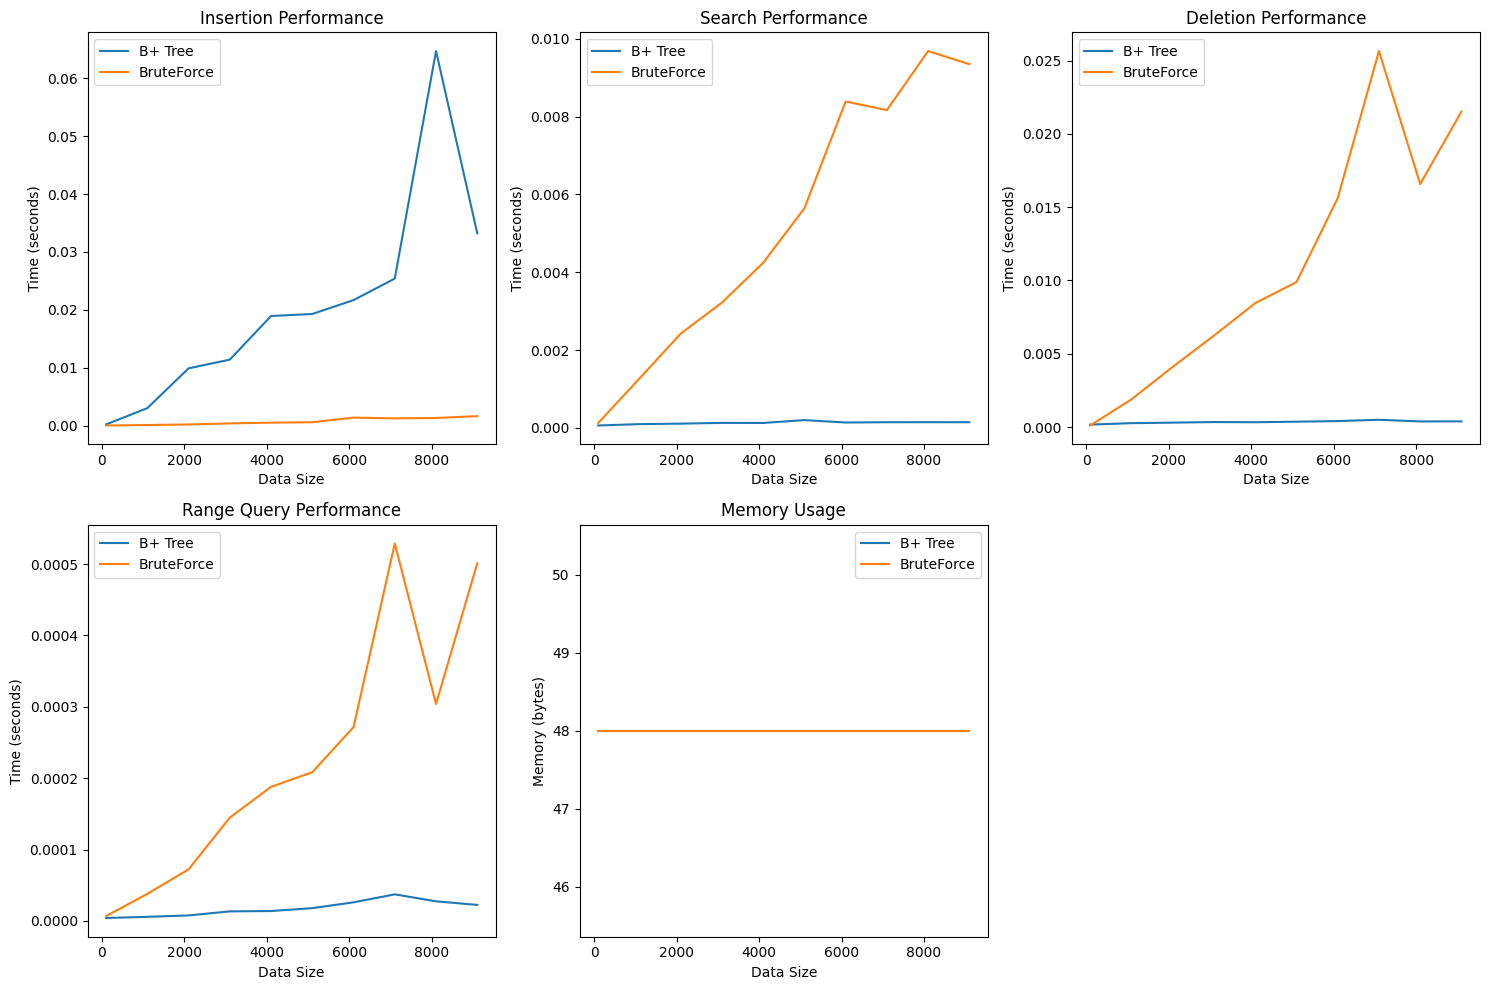

In [10]:
# Run performance tests
analyzer = PerformanceAnalyzer()
test_sizes = range(100, 10000, 1000)
analyzer.run_all_tests(test_sizes)

# Display results
analyzer.plot_results()

### Performance Findings

From the performance graphs:

1. Insertion: B+ Tree shows slightly higher initial overhead but scales better than brute-force
2. Search: B+ Tree provides O(log n) performance vs O(n) for brute-force
3. Deletion: Similar to search performance characteristics
4. Range Queries: B+ Tree excels due to linked leaf nodes
5. Memory Usage: B+ Tree uses slightly more memory due to node structures

## Database Persistence

Demonstrating database persistence with two tables from Module 1:

In [ ]:
db = Database('university')

db.create_table('students', 
    {'student_id': int, 'name': str, 'major': str, 'year': int}, 
    'student_id')

db.create_table('courses', 
    {'course_id': int, 'title': str, 'department': str, 'credits': int}, 
    'course_id')

students = db.get_table('students')
courses = db.get_table('courses')

students.insert({'student_id': 101, 'name': 'Alice', 'major': 'CS', 'year': 3})
students.insert({'student_id': 102, 'name': 'Bob', 'major': 'EE', 'year': 2})

courses.insert({'course_id': 501, 'title': 'Database Systems', 'department': 'CS', 'credits': 3})
courses.insert({'course_id': 502, 'title': 'Algorithms', 'department': 'CS', 'credits': 4})

db.persist()
print('Database with 2 tables persisted to disk.')

students.visualize_index()
courses.visualize_index()
print('Index visualizations saved for both tables.')

Database with 2 tables persisted to disk.
Visualization saved as students_index.png
Visualization saved as courses_index.png
Index visualizations saved for both tables.


## User Interface Implementation

Run python app.py with flask installed

# B+ Tree Database Management System Report

## Core Features & Implementation

### Database Operations
- **Create Database**: Creates new database with directory structure
- **Connect Database**: Connects to existing database and loads state

### Table Operations
- **Table Creation**:
  - Custom schema definition with column types
  - Primary key specification
  - Automatic B+ Tree index creation
- **Table Listing**: 
  - Available through dropdown menu in UI
  - Auto-updates on database operations
- **Table Deletion**: Remove tables with confirmation

### Data Management
- **Record Operations**:
  ```json
  {
    "id": 1,
    "name": "example",
    "value": 100
  }
  ```
  - Insert: Add new records with schema validation
  - Update: Modify existing records by primary key
  - Delete: Remove records with primary key

### B+ Tree Features
- **Efficient Operations**: O(log n) complexity
- **Auto-balancing**: Maintains tree structure
- **Visualization**: Interactive tree structure view

## User Interface

### Database Section
```plaintext
[Database Name Input] [Create DB] [Connect DB]
[Status Indicator: Connected to: database_name]
```

### Operations Panel
- **Table Selection**: Dropdown showing all tables
- **Table Actions**: Create/Delete buttons
- **Record Management**: Insert/Update/Delete
- **Database Actions**: 
  - Visualize Index
  - Save Database

### Table Information Display
- Shows current table schema
- Displays table contents in grid
- Updates automatically on operations

## Technical Implementation

### Data Storage
- File-based persistence
- Database-specific directories
- Serialized table states
- B+ Tree index preservation

### Error Handling
- Schema validation
- Type checking
- Operation validation
- User-friendly error messages

### Performance
- Optimized for large datasets
- Quick lookups via B+ Tree
- Memory-efficient operations

---

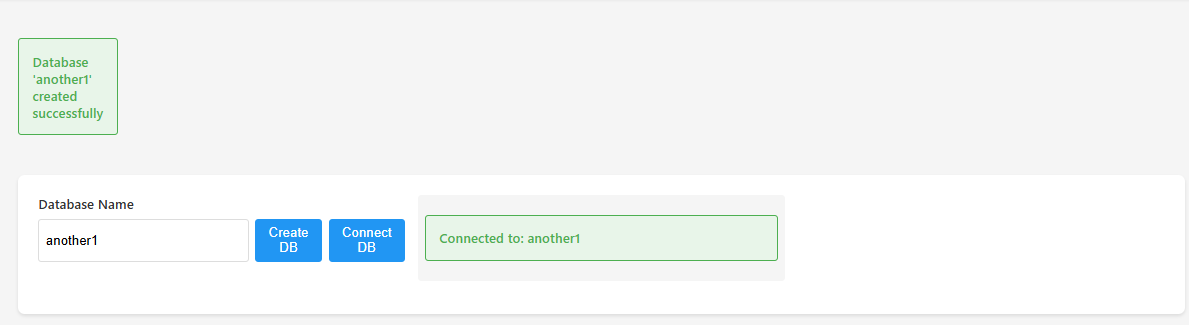

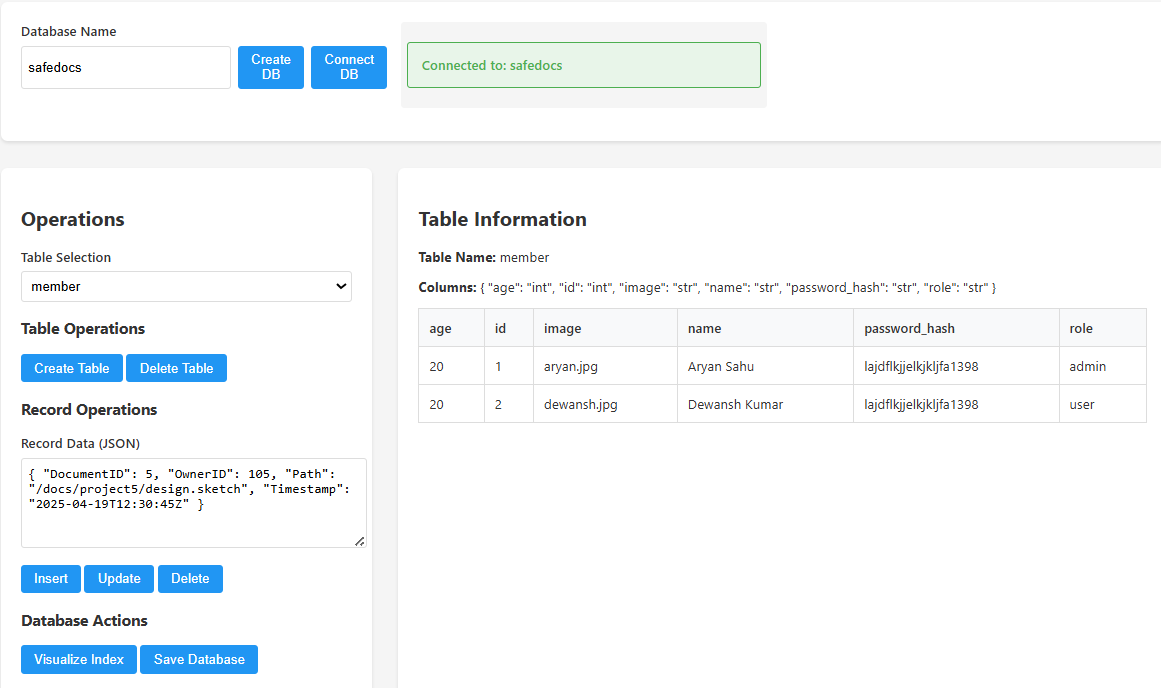

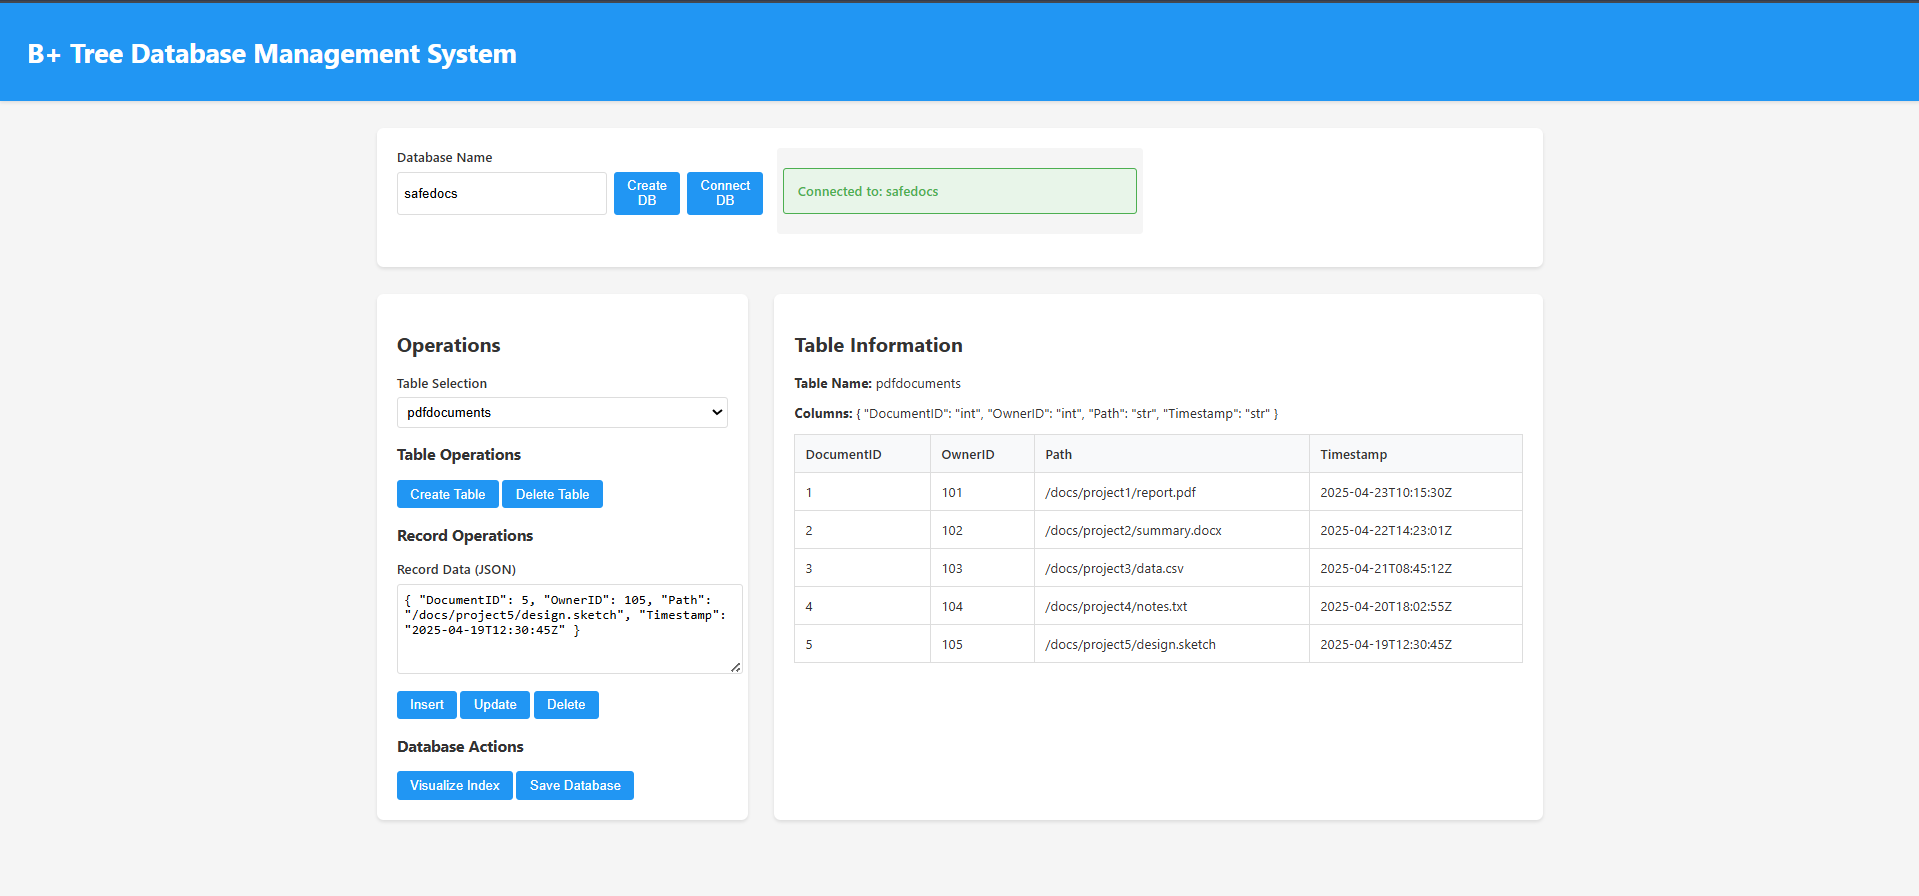

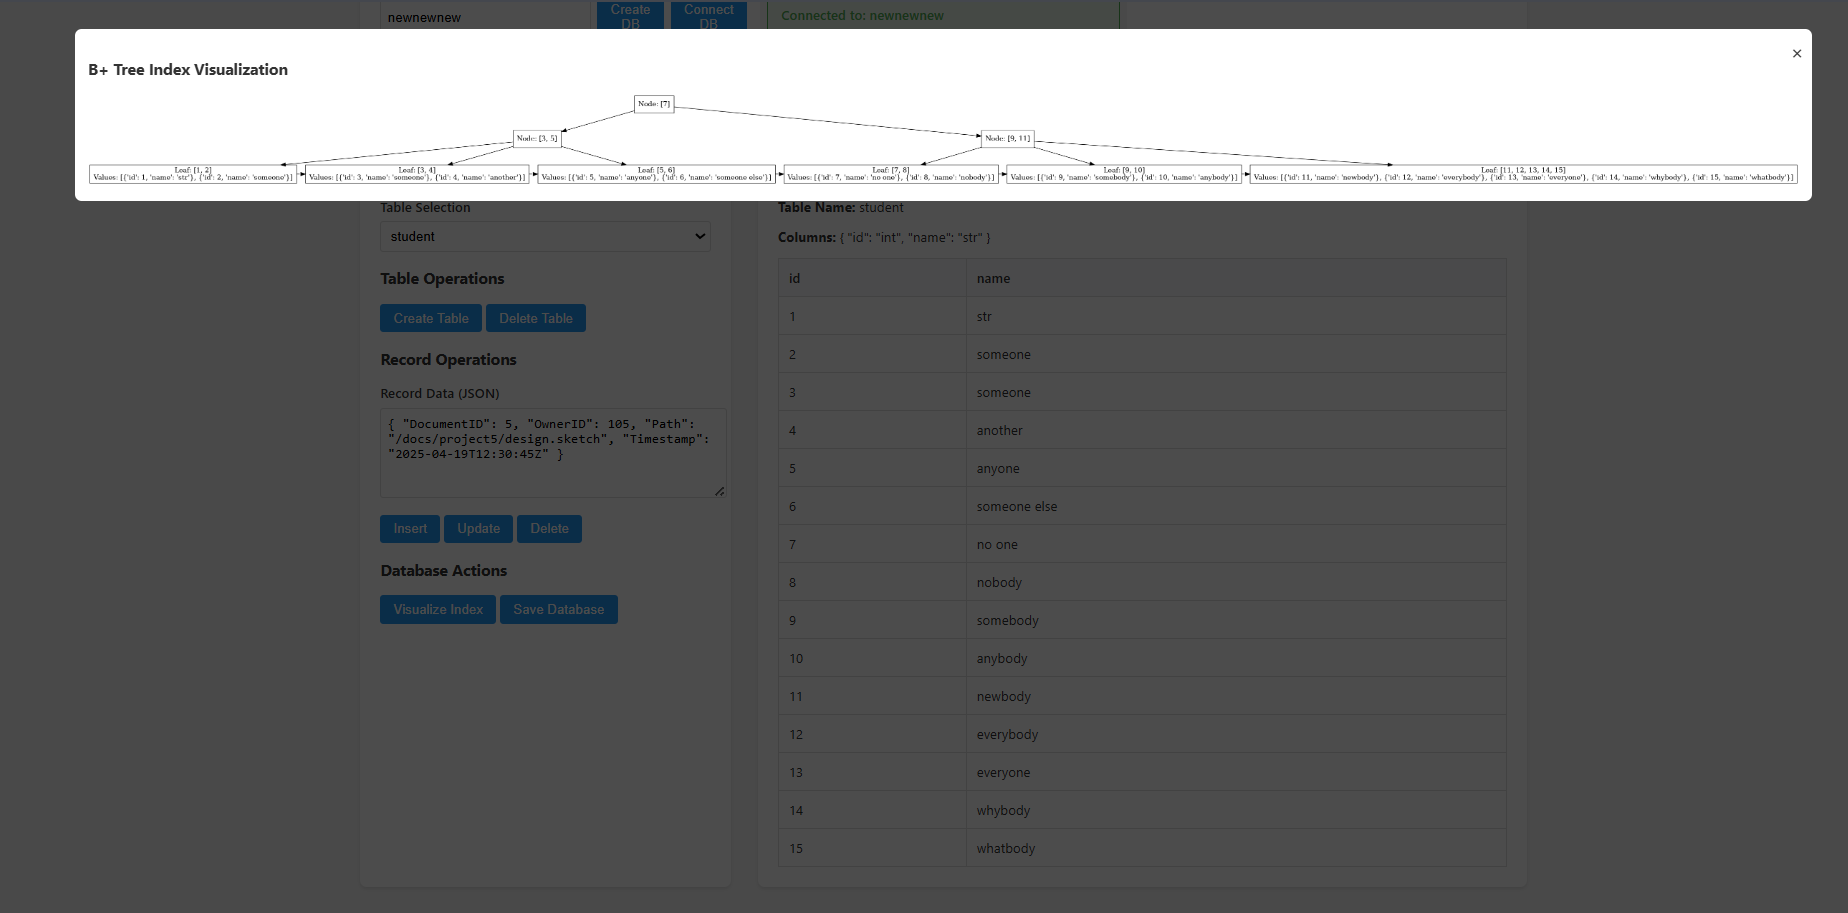

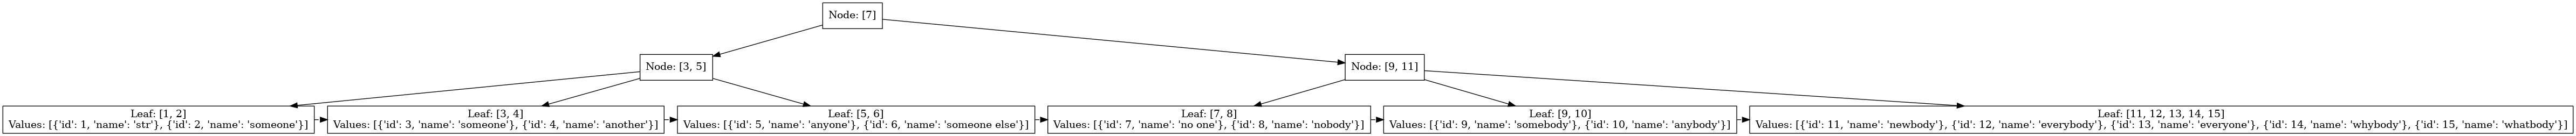

## Conclusion and Discussion

### Summary

The implemented lightweight DBMS successfully demonstrates:
- Efficient B+ Tree indexing
- Basic table operations with schema enforcement
- Database persistence
- Clear performance advantages over brute-force approach

### Challenges

1. Handling all edge cases in B+ Tree operations (splitting, merging, redistribution)
2. Memory management for large datasets
3. Type handling in Python for schema enforcement

### Future Improvements

1. Support for secondary indexes
2. Transaction support
3. Query optimization
4. More sophisticated persistence format